<a href="https://colab.research.google.com/github/kude0930/DeepLearning_B/blob/main/%EB%B0%B1%EA%B2%AC%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8_with_Tensorflow_2_x_Ch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.1 MNIST와 Fashion-MNIST**

**4.1.1 데이터 살펴보기**

In [ ]:
# MNIST Dataset Download
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운
(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 데이터의 형태 확인하기

# Training Data
print(x_train.shape, y_train.shape)
print(y_train)

# Test Data
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


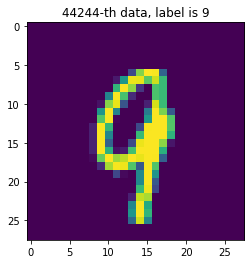

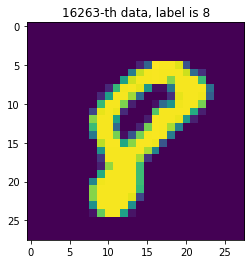

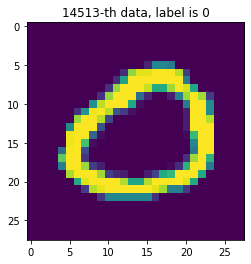

In [ ]:
# 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
# 0~59999의 범위에서 무작위로 세 개의 정수를 선택
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx :
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx, label))

In [ ]:
# 검증 데이터 만들기
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
# train_test_split() : 데이터셋을 각 세트(학습, 검증, 테스트)로 분리할 때 사용
# test_size : 테스트셋(검증셋)의 비율 의미 → 0.3(30%)
# random_state : 재생산성을 위해 사용 → seed와 사용 의미가 동일

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [ ]:
# 모델 입력을 위한 데이터 전처리
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


In [ ]:
# 모델 입력을 위한 레이블 전처리
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**4.1.2 모델 구성하기**

In [ ]:
# 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 함
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 신경망
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
# 소프트맥스와 시그모이드 값의 비교
def softmax(arr) :
  m = np.max(arr)
  arr = arr - m # exp의 오버플로우 방지
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x) :
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision = 3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [ ]:
# 학습과정 설정하기
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
# 옵티마이저 : Adam
# 손실 함수 : categorical_crossentropy
# 모니터링 할 평가지표 : acc

**4.1.3 모델 학습하기**

In [ ]:
# 모델 학습하기
history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))
# model.fit() : history 객체를 반환
# 128의 배치 크기 사용
# 전체 데이터를 30회 반복

Epoch 1/30
329/329 [==============================] - 4s 5ms/step - loss: 0.4831 - acc: 0.8635 - val_loss: 0.2515 - val_acc: 0.9278
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2094 - acc: 0.9394 - val_loss: 0.1905 - val_acc: 0.9439
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1664 - acc: 0.9521 - val_loss: 0.1685 - val_acc: 0.9523
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1394 - acc: 0.9597 - val_loss: 0.1519 - val_acc: 0.9543
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1196 - acc: 0.9655 - val_loss: 0.1404 - val_acc: 0.9589
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1031 - acc: 0.9693 - val_loss: 0.1285 - val_acc: 0.9625
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0912 - acc: 0.9725 - val_loss: 0.1339 - val_acc: 0.9602
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

In [ ]:
# history를 통해 확인해볼 수 있는 값 출력하기
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

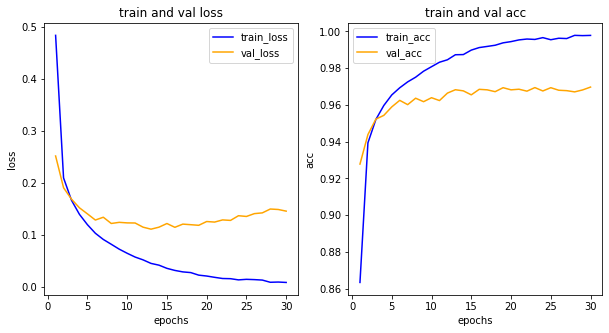

In [ ]:
# 학습 결과 그려보니
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙음

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

**4.1.4 예측하고 정답과 비교해보기**

In [ ]:
# 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1382 - acc: 0.9702


[0.13821779191493988, 0.9702000021934509]

In [ ]:
# 학습된 모델을 통해 값 예측하기
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision = 7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results [0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[2.6114599e-10 5.5648930e-11 5.5566467e-09 4.8313658e-03 2.8082195e-14
 8.0896871e-07 1.4903960e-18 9.9512082e-01 4.0374402e-06 4.2888561e-05]


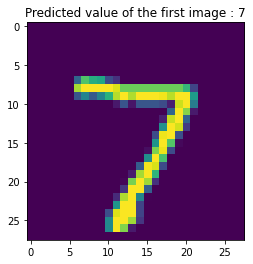

In [ ]:
# 예측값 그려서 확인해보기
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옴
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))

plt.show()

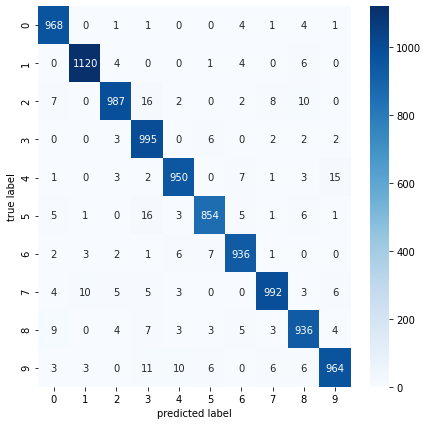

In [ ]:
# 모델 평가 방법1 : 혼동행렬
# sklearn.metrics 모듈은 여러 가지 평가지표에 관한 기능 제공
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬 : 데이터에 대한 모델의 강점과 약점을 파악하기에 유용
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')

plt.show()

In [ ]:
# 모델 평가 방법2 : 분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.94      0.99      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# MNIST 데이터셋 다루기 : 전체 코드
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
tf.random.set_seed(777)

(x_train, y_train), (x_test, y_test) = load_data(path = 'mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

# model.evaluate(x_test, y_test)
results = model.predict(x_test)

Epoch 1/30
329/329 [==============================] - 2s 6ms/step - loss: 0.5026 - acc: 0.8525 - val_loss: 0.2539 - val_acc: 0.9276
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2104 - acc: 0.9389 - val_loss: 0.1863 - val_acc: 0.9463
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1584 - acc: 0.9534 - val_loss: 0.1597 - val_acc: 0.9542
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1277 - acc: 0.9632 - val_loss: 0.1345 - val_acc: 0.9607
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1061 - acc: 0.9687 - val_loss: 0.1276 - val_acc: 0.9623
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0904 - acc: 0.9730 - val_loss: 0.1194 - val_acc: 0.9647
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0788 - acc: 0.9765 - val_loss: 0.1140 - val_acc: 0.9653
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

**4.1.5 Fashion-MNIST**

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터 다운
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


<function matplotlib.pyplot.show>

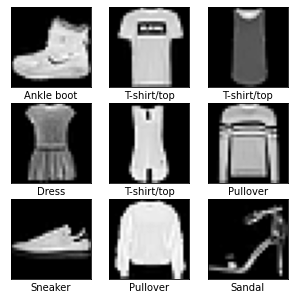

In [ ]:
# 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx) :
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])

plt.show

In [ ]:
# 잔처리 및 검증 데이터셋 만들기
# 0~1 범위로 만듦
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만듦
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 0.7/0.3 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

In [ ]:
# 첫 번째 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

first_model = Sequential()

# 입력 데이터의 형태를 꼭 명시해야 함
first_model.add(Flatten(input_shape = (28, 28))) # (28, 28) → (28 * 28)
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

In [ ]:
# 학습 과정 설정 및 학습하기
first_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
# 옵티마이저 : Adam
# 손실함수 : categorical_crossentropy
# 모니터링 할 평가지표 : acc

first_history = first_model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 4s 4ms/step - loss: 0.4789 - acc: 0.8668 - val_loss: 0.2318 - val_acc: 0.9336
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2030 - acc: 0.9402 - val_loss: 0.1888 - val_acc: 0.9459
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1560 - acc: 0.9544 - val_loss: 0.1558 - val_acc: 0.9549
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1285 - acc: 0.9628 - val_loss: 0.1354 - val_acc: 0.9614
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1083 - acc: 0.9694 - val_loss: 0.1300 - val_acc: 0.9629
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0938 - acc: 0.9725 - val_loss: 0.1245 - val_acc: 0.9639
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0807 - acc: 0.9764 - val_loss: 0.1248 - val_acc: 0.9624
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
# 두 번째 모델 구성하기
second_model = Sequential()

# 입력 데이터의 형태를 꼭 명시
second_model.add(Flatten(input_shape = (28, 28))) # (28, 28) → (28 * 28)
# 128개의 출력을 가지는 Dense층을 추가
second_model.add(Dense(128, activation = 'relu'))
# 64개의 출력을 가지는 Dense층을 추가
second_model.add(Dense(64, activation = 'relu'))
# 32개의 출력을 가지는 Dense층을 추가
second_model.add(Dense(32, activation = 'relu'))
# 10개의 출력을 가지는 신경망을 추가
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
# 옵티마이저 : Adam
# 손실 함수 : categorical_crossentropy
# 모니터링 할 평가지표 : acc

second_history = second_model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.4035 - acc: 0.8854 - val_loss: 0.1912 - val_acc: 0.9432
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1561 - acc: 0.9529 - val_loss: 0.1367 - val_acc: 0.9598
Epoch 3/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1069 - acc: 0.9682 - val_loss: 0.1224 - val_acc: 0.9633
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0801 - acc: 0.9762 - val_loss: 0.1182 - val_acc: 0.9652
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0672 - acc: 0.9798 - val_loss: 0.0998 - val_acc: 0.9701
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0498 - acc: 0.9845 - val_loss: 0.0969 - val_acc: 0.9711
Epoch 7/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0397 - acc: 0.9885 - val_loss: 0.0956 - val_acc: 0.9725
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

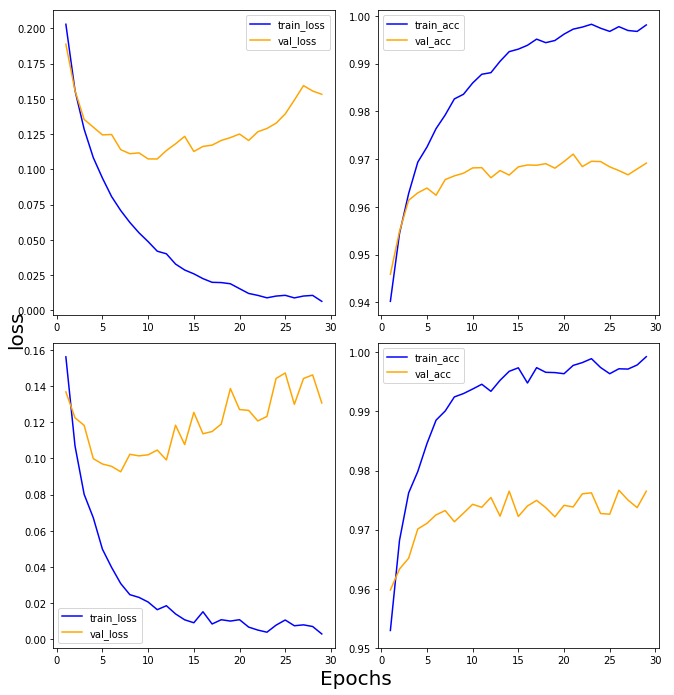

In [ ]:
# 두 모델의 학습 과정 그려보기
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs) :
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1, 1, 1)
  # axis 선과 ax의 축 레이블 제거
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor = 'w', top = False, bottom = False, left = False, right = False)

  for i in range(len(his_dict_1)) :
    temp_ax = fig.add_subplot(2, 2, i + 1)
    temp = keys[i % 2]
    val_temp = keys[(i + 2) % 2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)

    if(i == 1 or i == 3) :
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))

    temp_ax.legend()

  ax.set_ylabel('loss', size = 20)
  ax.set_xlabel('Epochs', size = 20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)


# **4.2 보스턴 주택 가격 예측**

**4.2.1 데이터 살펴보기**

In [ ]:
# 보스턴 주택 가격 데이터셋 다운 받기
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터 다운
(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz', test_split = 0.2, seed = 777)

57344/57026 [==============================] - 0s 0us/step


In [ ]:
# 데이터 형태 확인하기
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
# 데이터 전처리 및 검증 데이터셋 만들기
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 검증 데이터셋을 만듦
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 777)

**4.2.2 모델 구성하기**

In [ ]:
# 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 입력 데이터의 형태를 꼭 명시
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense층
model.add(Dense(1)) # 하나의 값 출력

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

**4.2.3 모델 학습하고 평가하기**

In [ ]:
# 학습하고 평가하기
history = model.fit(x_train, y_train, epochs = 300, validation_data = (x_val, y_val))
model.evaluate(x_test, y_test)

Epoch 1/300
6/6 [==============================] - 0s 29ms/step - loss: 560.0189 - mae: 21.9780 - val_loss: 534.0543 - val_mae: 21.5813
Epoch 2/300
6/6 [==============================] - 0s 6ms/step - loss: 543.7247 - mae: 21.5953 - val_loss: 517.8265 - val_mae: 21.1885
Epoch 3/300
6/6 [==============================] - 0s 7ms/step - loss: 527.3849 - mae: 21.2043 - val_loss: 501.2743 - val_mae: 20.7798
Epoch 4/300
6/6 [==============================] - 0s 6ms/step - loss: 510.0734 - mae: 20.7919 - val_loss: 483.9913 - val_mae: 20.3393
Epoch 5/300
6/6 [==============================] - 0s 6ms/step - loss: 491.4444 - mae: 20.3310 - val_loss: 464.9306 - val_mae: 19.8461
Epoch 6/300
6/6 [==============================] - 0s 6ms/step - loss: 471.3814 - mae: 19.8124 - val_loss: 443.4487 - val_mae: 19.2752
Epoch 7/300
6/6 [==============================] - 0s 7ms/step - loss: 448.4414 - mae: 19.2149 - val_loss: 419.5773 - val_mae: 18.6131
Epoch 8/300
6/6 [==============================] - 0s 

[11.21523666381836, 2.3661530017852783]

In [ ]:
# K-Fold 사용하기
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz', test_split = 0.2, seed = 777)

# 데이터 표준화
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)
# 여기까지 전부 동일
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# K-Fold 진행
k = 3

# 주어진 데이터셋을 k만큼 등분
# ex. k = 3 : 학습 데이터셋을 3등분하여
# 한 개는 검증셋으로, 나머지 두 개는 학습 데이터셋으로 활용
kfold = KFold(n_splits = k, random_state = 777)

# K-Fold 과정에서 재사용을 위해 모델을 반환하는 함수 정의
def get_model() :
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

mae_list = [] # 테스트셋을 평가한 후 결과 mae를 담을 리스트 선언

# k번 진행
for train_index, val_index in kfold.split(x_train) :
  # 해당 인덱스는 무작위로 생성
  # 무작위로 생성해주는 것은 과대적합을 피할 수 있는 좋은 방법
   x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
   y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

   # 모델을 불러옴
   model = get_model()

   model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))

   _, test_mae = model.evaluate(x_test, y_test)
   mae_list.append(test_mae)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Epoch 1/300
9/9 [==============================] - 0s 16ms/step - loss: 553.2058 - mae: 21.7213 - val_loss: 526.3162 - val_mae: 21.1508
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 521.7735 - mae: 21.0064 - val_loss: 496.5589 - val_mae: 20.4377
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 487.9875 - mae: 20.1979 - val_loss: 461.2929 - val_mae: 19.5658
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 446.0217 - mae: 19.1854 - val_loss: 419.0526 - val_mae: 18.4584
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 397.3863 - mae: 17.8883 - val_loss: 367.5354 - val_mae: 17.0393
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 338.3179 - mae: 16.2681 - val_loss: 309.1865 - val_mae: 15.3232
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 273.6404 - mae: 14.3536 - val_loss: 246.1508 - val_mae: 13.3287
Epoch 8/300
9/9 [==============================] - 0s 

In [ ]:
# K-Fold 결과 확인
print(mae_list)
print(np.mean(mae_list))

[2.13325834274292, 2.1784582138061523, 2.239683151245117]
2.183799902598063


# **4.3 빙산인가? 선박인가? -1**

**4.3.1 캐글 대회**

**4.3.2 캐글 대회를 통해 알 수 있는 것 또는 알아야 할 것**



*   대회 페이지에 [Notebooks]를 클릭한 뒤, [New Notebooks] 버튼을 눌러 새로운 캐글 노트북을 만든다. 캐글에서 자동으로 제공하고 있는 코드를 실행하면 우리가 사용할 수 있는 데이터의 경로를 출력해준다.
*   데이터의 구성을 자세히 확인해 보는 것은 지나치지 말아야 할 필수 과정이다.
*   학습 데이터셋에 적용한 전처리 방법은 테스트 데이터셋에 동일하게 적용해야 한다.
*   '이진 분류(0과 1)에서는 시그모이드 함수', '다중 분류(0, 1, 2, ...)에서는 소프트맥스 함수', '연속적인 값을 예측해야 하는 회귀 문제에서는 항등함수(이 책에서는 linear 활성화 함수를 사용한 적이 있습니다)'를 사용한다는 것을 기억한다.
*   캐글의 GPU는 사용일부터 7일 간격으로 30시간 동안 사용할 수 있다(2020년 4월 기준). 따라서 데이터를 살펴보는 것과 모델을 구성하는 단계에서는 가급적이면 CPU를 활용하거나 본인의 데스크톱 또는 노트북을 활용하는 것을 권장한다.







# **4.4 무슨 옷과 무슨 색? -1**

In [ ]:
# 데이터 불러오기
import pandas as pd

DATA_PATH = './csv_data/nocolorinfo'

train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')

train_df.head()

FileNotFoundError: ignored

In [ ]:
# 이미지 제네레이터 정의 및 모델 구성하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 제네레이터를 정의
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

def get_steps(num_samples, batch_size) :
  if (num_samples % batch_size) > 0 :
    return (num_samples // batch_size) + 1
  else :
    return num_samples // batch_size

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()

# 입력 데이터의 형태를 꼭 명시
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) → (112 * 112 * 3)
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(11, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
# 데이터 제네레이터 정의하기
batch_size = 32
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt', 'pants', 'shorts', 'shoes']

# Make Generator
train_generator = train_datagen.flow_from_dataframe(dataframe = train_df, directory = '', x_col = 'image', y_col = class_col, target_size = (112, 112), color_mode = 'rgb', class_mode = 'other', batch_size = batch_size, seed = 42)

val_generator = val_datagen.flow_from_dataframe(dataframe = train_df, directory = '', x_col = 'image', y_col = class_col, target_size = (112, 112), color_mode = 'rgb', class_mode = 'other', batch_size = batch_size, shuffle = True)

In [ ]:
# 제네레이터를 통해 모델 학습시키기
model.fit(train_generator, steps_per_epoch = get_steps(len(train_df), batch_size), validation_data = val_generator, validation_steps = get_steps(len(val_df), batch_size), epochs = 10)

In [ ]:
# 테스트 데이터 예측하기
# 8개만 예측
do_preds = preds[:8]

for i, pred in enumerate(do_preds) :
  plt.subplot(2, 4, i + 1)
  prob = zip(class_col, list(pred))
  prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

  image = cv2.imread(test_df['image'][i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

  plt.tight_layout()